# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** [Trinity Schroeder]  
**Date:** [09/14/2025]  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [6]:
# Load required packages for data cleaning
library(tidyverse) 

# Check current working directory
getwd()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "/workspaces/assignment-2-version3-trinitysch/assignment/Homework"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [10]:
# Import the messy sales dataset
messy_sales <- readr::read_csv("/workspaces/assignment-2-version3-trinitysch/data/messy_sales_data.csv", show_col_types = FALSE)

cat("Messy sales dataset imported successfully!\n")
cat("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns\n")
cat("Column names:", paste(names(messy_sales), collapse = ", "), "\n")

Messy sales dataset imported successfully!
Dataset contains 200 rows and 6 columns
Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity 


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [13]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 150) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
1    1            NA            Home              362.3175    <NA>         
2    2            Alice Brown   Clothing          573.0791    2023-10-21   
3    3            Jane Doe      Electronics       487.6874    2023-12-28   
4    4            Jane Doe      Electronics      5000.0000    2023-06-16   
5    5            John Smith    Books             344.1746    2023-05-05   
6    6            John Smith    Books             434.9527    2023-11-28   
7    7            Jane Doe      Home              489.0863    2023-08-17   
8    8            Jane Doe      Electronics       536.9202    2023-05-17   
9    9            Jane Doe      Clothing          793.3933    2023-08-13   
10  10            Jane Doe      electronics       649.4286    2023-10-16   
11  11            Bob Johnson   ELECTRONICS       595.7247    2023-10-20   
12  12            John Smith    Books             742.6123    2023-06-26   
13  13            Jane Doe      ELECTRONICS       730.3686    2023-05-08   
14  14            Alice Brown   electronics       675.6297    2023-12-20   
15  15            John Smith    ELECTRONICS       360.0370    2023-08-22   
16  16            Bob Johnson   Books             246.2655    <NA>         
17  17            Alice Brown   electronics       309.7985    2023-10-22   
18  18            John Smith    electronics             NA    2023-05-21   
19  19            Jane Doe      ELECTRONICS       343.8747    2023-06-22   
20  20            Jane Doe      ELECTRONICS       715.3258    2023-01-25   
21  21            NA            Books             483.1180    2023-04-04   
22  22            Bob Johnson   Books             455.5846    2023-03-05   
23  23            Jane Doe      Home                    NA    2023-01-11   
24  24            Jane Doe      Clothing          690.4822    2023-08-08   
25  25            Jane Doe      ELECTRONICS       334.7057    2023-12-05   
26  26            NA            Clothing          531.2289    2023-09-12   
27  27            Alice Brown   ELECTRONICS       604.5938    2023-03-09   
28  28            Jane Doe      electronics       689.9168    2023-09-02   
29  29            Alice Brown   Home              549.7528    2023-10-01   
30  30            Alice Brown   Books             410.8753    2023-01-22   
⋮   ⋮             ⋮             ⋮                ⋮            ⋮            
121 121           NA            Electronics       -100.00000  <NA>         
122 122           Alice Brown   Home               792.80142  2023-06-05   
123 123           Alice Brown   electronics        191.13720  2023-02-27   
124 124           Alice Brown   electronics        306.18832  2023-05-25   
125 125           John Smith    electronics        537.21472  2023-12-10   
126 126           NA            Home               433.43557  2023-11-26   
127 127           John Smith    electronics        194.09321  2023-06-16   
128 128           John Smith    Books              776.07924  2023-04-19   
129 129           Bob Johnson   Home               817.39074  2023-09-21   
130 130           Bob Johnson   ELECTRONICS        430.56969  2023-01-14   
131 131           Jane Doe      Books              421.48859  2023-07-05   
132 132           John Smith    ELECTRONICS        881.22385  2023-03-20   
133 133           Jane Doe      ELECTRONICS        352.85636  2023-08-27   
134 134           John Smith    Books                     NA  2023-04-26   
135 135           John Smith    electronics        639.68179  2023-08-01   
136 136           Bob Johnson   Books              593.64283  <NA>         
137 137           Alice Brown   Home               654.22634  2023-09-19   
138 138           Alice Brown   electronics        900.44590  2023-12-06   
139 139           Bob Johnson   Electronics        105.64775  2023-08-11   
140 140           Jane Doe      Clothing           -56.71519  2023-07-20   
141 141           NA            Electronics        7

In [52]:
# Structure and summary of the data 
print("=== DATASET STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

[1] "=== DATASET STRUCTURE ==="
spc_tbl_ [200 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ TransactionID   : num [1:200] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr [1:200] NA "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr [1:200] "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num [1:200] 362 573 488 5000 344 ...
 $ Purchase_Date   : Date[1:200], format: NA "2023-10-21" ...
 $ Quantity        : num [1:200] 2 3 -1 7 100 4 0 7 3 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   TransactionID = col_double(),
  ..   Customer_Name = col_character(),
  ..   Product_Category = col_character(),
  ..   Sales_Amount = col_double(),
  ..   Purchase_Date = col_date(format = ""),
  ..   Quantity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
[1] "=== SUMMARY STATISTICS ==="


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-26   1st Qu.:  2.00  
 Median :2023-06-28   Median :  5.00  
 Mean   :2023-06-23   Mean   : 12.52  
 3rd Qu.:2023-09-12   3rd Qu.:  8.00  
 Max.   :2023-12-28   Max.   :100.00  
 NA's   :14                           

# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

**Data Quality Assessment:** 

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. ** Missing Values:** [Customer_Name, Sales_Amount, and possibly Quantity and Product_Category are missing values.]

2. ** Potential Outliers:** [Some values in Sales_Amount and Quantity appear extreme compared to the rest of the data. For example, there may be unusually high sales amounts or quantities that do not fit the typical range, indicating possible outliers.]

3. ** Data Inconsistencies:** [The Product_Category column shows inconsistent naming conventions, such as different spellings, capitalization, or extra spaces.]

4. ** Data Types:** [Purchase_Date should be in date format, but may be imported as character or factor. Sales_Amount should be numeric, but could contain non-numeric entries or be imported incorrectly.]

5. ** Invalid Values:** [There are logically impossible values, such as negative quantities or sales amounts, which should not occur in sales data. These need to be identified and addressed during cleaning.]

**YOUR OBSERVATIONS:**

[The missing values in Customer_Name and Sales_Amount are particularly concerning as they are critical for analysis. The potential outliers in Sales_Amount and Quantity could skew results if not handled properly. Inconsistent naming in Product_Category could lead to misclassification during analysis. Ensuring correct data types for Purchase_Date and Sales_Amount is essential for accurate calculations and date-based analyses. Finally, any invalid negative values must be corrected or removed to maintain data integrity.]

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [16]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"


# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8            41 NA            ELECTRONICS              789. 2023-11-04   
 9            43 Bob Johnson   ELECTRONICS               NA  2023-12-28   
10            45 Jane Doe      electronics               NA  2023-01-08   
# ℹ 34 more rows
# ℹ 1 more variable: Quantity <dbl>


In [20]:

# Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)

# Compare dimensions
cat("Original dataset dimensions:\n")
print(dim(messy_sales))
cat("After removing NA rows:\n")
print(dim(sales_removed_na))
cat("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na), "\n")

Original dataset dimensions:
[1] 200   6
After removing NA rows:
[1] 156   6
Rows lost: 44 


In [21]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [28]:
## Create a copy for imputation
sales_imputed <- messy_sales

In [35]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) 
  ### YOUR CODE HERE
  {
    uniqv <- unique(v[!is.na(v)]) # Remove NA for mode calculation
    uniqv[which.max(tabulate(match(v, uniqv)))]
  }
  ### Hint: Use unique(), tabulate(), match(), and which.max()

In [39]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name <- # YOUR CODE HERE 
get_mode(sales_imputed$Customer_Name)
sales_imputed$Customer_Name[is.na(sales_imputed$Customer_Name)] <- mode_name

In [42]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity <- # YOUR CODE HERE
median(sales_imputed$Quantity, na.rm = TRUE)

In [43]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


In [44]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [45]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [46]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [47]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

[I would use imputation for this dataset because it allows us to retain all available data points, which is especially important if the dataset is not very large. Imputation helps to maintain the overall structure and relationships within the data, reducing the risk of bias that can occur with deletion methods. Additionally, using mean or median for numeric variables and mode for categorical variables provides a reasonable estimate for missing values without significantly distorting the data distribution.]

2. **What are the trade-offs between removal and imputation?**

[Removal:

Pros: Ensures only complete, reliable data is used; avoids introducing artificial values.
Cons: Reduces sample size, which can decrease statistical power and potentially bias results if missingness is not random.
Imputation:

Pros: Preserves sample size and maintains more information; useful when missing data is moderate.
Cons: Imputed values may not reflect true data, possibly introducing bias or distorting distributions if not done carefully.]

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [60]:
# 3.1 Outlier Detection Using IQR Method

# Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- IQR(sales_imputed$Sales_Amount, na.rm = TRUE)

# Calculate outlier thresholds
lower_threshold <- Q1_sales - 1.5 * IQR_sales
upper_threshold <- Q3_sales + 1.5 * IQR_sales

# Identify outliers
outliers <- sales_imputed %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)

# Print results
print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 6"
[1] "Outlier rows:"


# A tibble: 6 × 6
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
          <dbl> <chr>         <chr>                   <dbl> <date>       
1             4 John Smith    Electronics              5000 2023-06-16   
2            46 John Smith    Books                    8000 NA           
3            96 John Smith    electronics             50000 2023-09-22   
4           146 John Smith    ELECTRONICS             12000 2023-01-22   
5           167 John Smith    Electronics            100000 2023-09-18   
6           177 John Smith    ELECTRONICS             25000 2023-08-03   
# ℹ 1 more variable: Quantity <dbl>


In [61]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- IQR(sales_imputed$Sales_Amount, na.rm = TRUE)

In [62]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [63]:
### TODO: Identify outliers
outliers <- sales_imputed %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 6"
[1] "Outlier rows:"
# A tibble: 6 × 6
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
          <dbl> <chr>         <chr>                   <dbl> <date>       
1             4 John Smith    Electronics              5000 2023-06-16   
2            46 John Smith    Books                    8000 NA           
3            96 John Smith    electronics             50000 2023-09-22   
4           146 John Smith    ELECTRONICS             12000 2023-01-22   
5           167 John Smith    Electronics            100000 2023-09-18   
6           177 John Smith    ELECTRONICS             25000 2023-08-03   
# ℹ 1 more variable: Quantity <dbl>


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


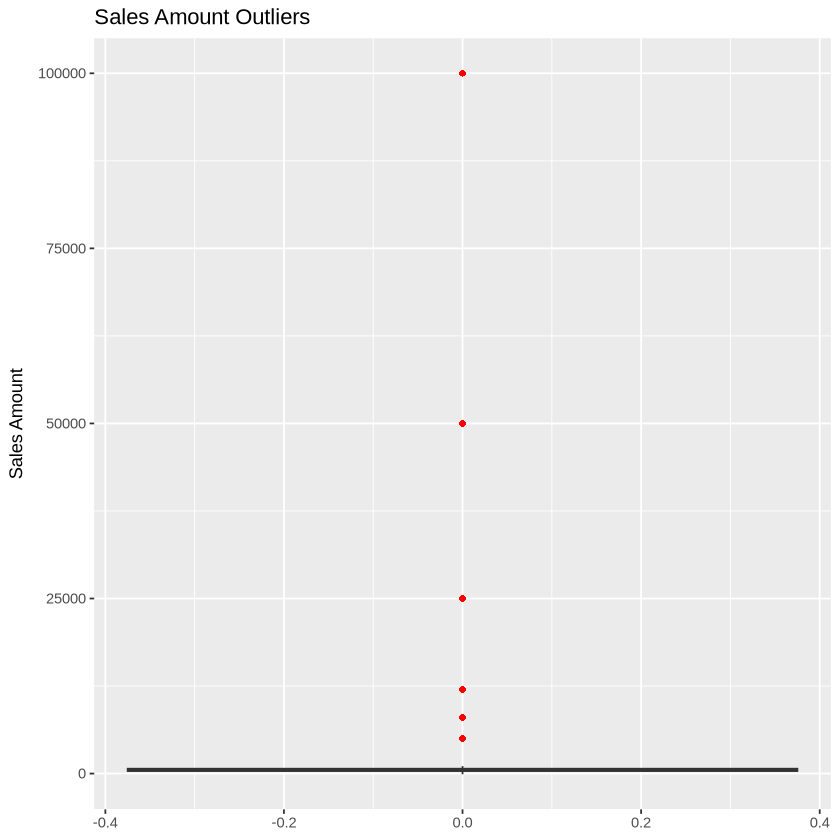

In [64]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16) +
  ggtitle("Sales Amount Outliers") +
  ylab("Sales Amount")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [65]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


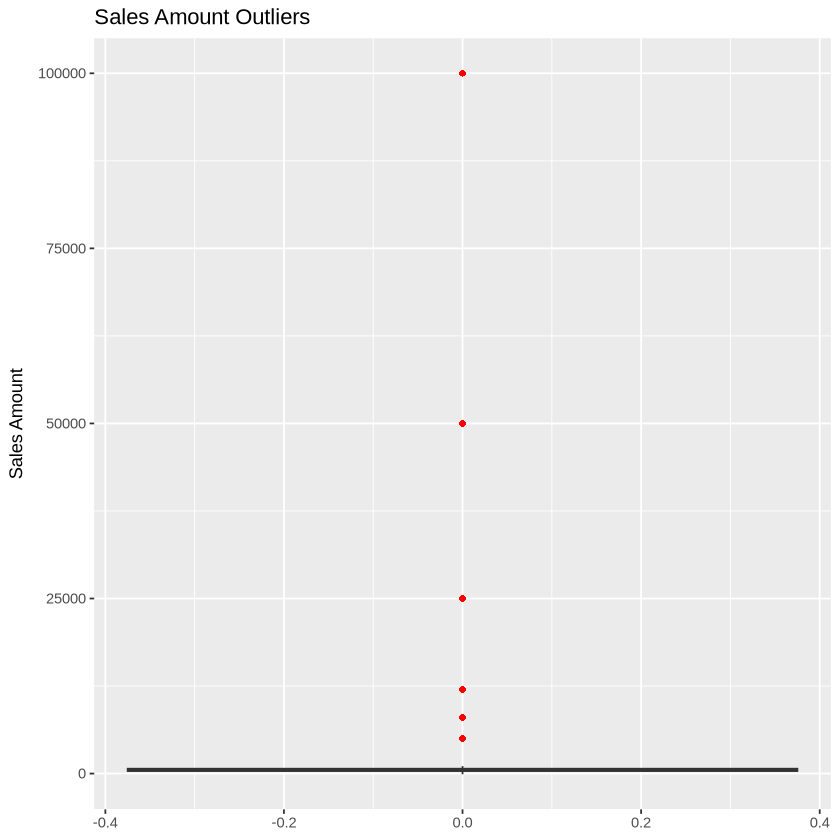

In [66]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16) +
  ggtitle("Sales Amount Outliers") +
  ylab("Sales Amount")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [67]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


In [68]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed %>%
  mutate(Sales_Amount = ifelse(Sales_Amount < lower_threshold, lower_threshold,
                               ifelse(Sales_Amount > upper_threshold, upper_threshold, Sales_Amount)))

In [69]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(
  sales_outliers_capped$Sales_Amount < lower_threshold, lower_threshold,
  ifelse(sales_outliers_capped$Sales_Amount > upper_threshold, upper_threshold, sales_outliers_capped$Sales_Amount)
)
### Hint: Use ifelse() to replace values above/below thresholds

In [70]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] -100.000 1192.331


In [71]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [72]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -100.0   362.6   531.3   531.5   694.5  1192.3      22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

[Write your detailed reasoning here]

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [78]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    sum(messy_sales$Sales_Amount < lower_threshold | messy_sales$Sales_Amount > upper_threshold, na.rm = TRUE)
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    sum(final_dataset$Sales_Amount < lower_threshold | final_dataset$Sales_Amount > upper_threshold, na.rm = TRUE)
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric Original_Data Final_Data
1      Number of Rows        200.00     200.00
2      Missing Values         52.00      36.00
3   Mean Sales_Amount       1614.91     531.50
4 Median Sales_Amount        531.29     531.29
5            Outliers          6.00       0.00


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

[In business scenarios where data accuracy is critical and missing values could indicate serious issues—such as financial audits, regulatory reporting, or medical records—removing rows with missing values is preferred to avoid introducing bias or false information. For example, in clinical trial data, missing patient outcomes should not be imputed, as this could misrepresent treatment effectiveness.

Imputation is preferred when missing values are random and the dataset is large enough that estimated values will not distort results. For example, in retail sales analysis, if a few transactions are missing product categories, imputing with the mode or a reasonable estimate allows for more complete analysis without losing valuable sales data]

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

[Outliers in the Sales_Amount column could represent unusual but valid business events, such as large bulk purchases, refunds, data entry errors, or fraudulent transactions. They should not always be removed—sometimes they provide important insights. If outliers are due to errors, they should be corrected or excluded. If they reflect real business activity, they should be treated (e.g., capped) rather than removed, to avoid losing valuable information and distorting analysis. The decision depends on the business context and the impact on results.]

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

[Missing values can lead to inaccurate calculations, such as underestimating average sales or misidentifying top-performing products if key data points are absent. Outliers can distort metrics by inflating or deflating averages and trends, making forecasts unreliable. Both issues can result in misleading insights, poor business decisions, and reduced trust in analytics outcomes. Proper data cleaning is essential to ensure valid and actionable results.]

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

[Removing or modifying data during cleaning can introduce bias, misrepresent reality, or hide important patterns, affecting decisions and stakeholder trust. Ethically, analysts must document all changes, justify their methods, and avoid manipulating data to achieve desired outcomes. Transparency is ensured by keeping detailed records of cleaning steps, sharing code and rationale, and, when possible, retaining original data for audit. Maintaining data integrity means using objective, reproducible methods and communicating limitations or uncertainties in the cleaned dataset.]

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**